# Predicting CA House Location

## Introduction
The goal of this project is to use a California housing dataset to predict the location of a CA household. The dataset was found on Kaggle!

In [1]:
# Imports
from copy import copy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score
from sklearn.feature_selection import SelectKBest, f_classif

In [2]:
# Load dataset
df = pd.read_csv('housing.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## EDA

In [4]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [5]:
df.shape

(20640, 10)

In [6]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
# Print all the columns where total bedrooms is NaN
df[df['total_bedrooms'].isna() == True]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [8]:
df.nunique()

longitude               844
latitude                862
housing_median_age       52
total_rooms            5926
total_bedrooms         1923
population             3888
households             1815
median_income         12928
median_house_value     3842
ocean_proximity           5
dtype: int64

In [9]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Data Visualization

### Distribution of Age of Houseowners By Location

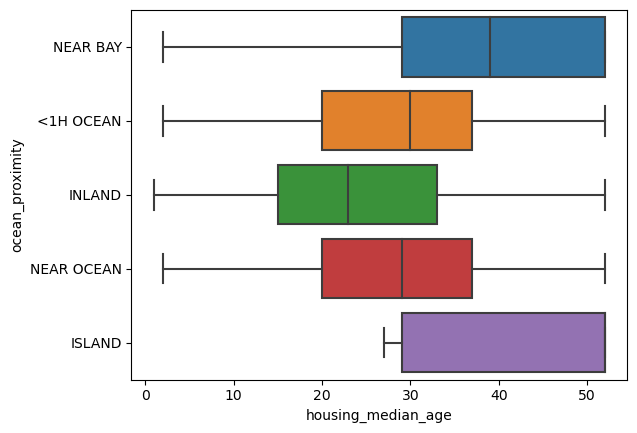

In [10]:
sns.boxplot(data=df, x="housing_median_age", y='ocean_proximity', orient='h');

### Number of Households in Each Location Type

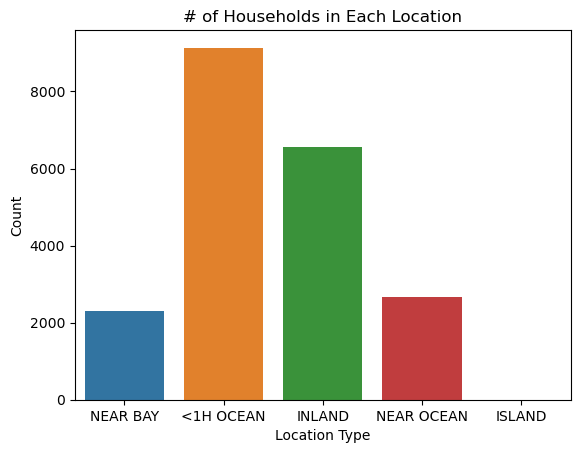

In [11]:
sns.countplot(data=df, x='ocean_proximity')
plt.title('# of Households in Each Location')
plt.xlabel('Location Type')
plt.ylabel('Count')
plt.show()

### Distribution of Median Household Prices Per Location

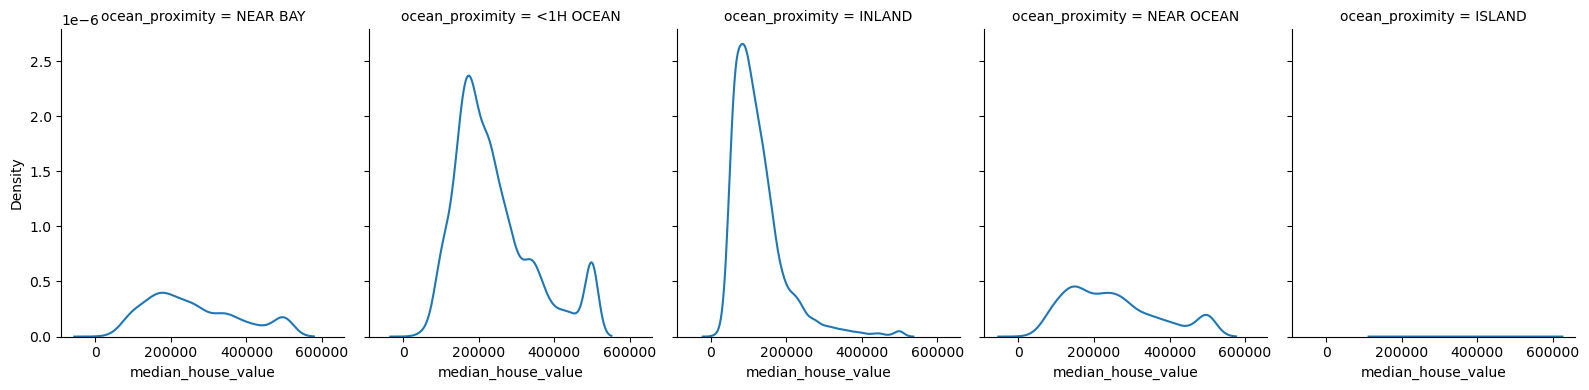

In [12]:
sns.displot(data=df, x='median_house_value', col='ocean_proximity', kind='kde', height=4, aspect=.8)
plt.show()

### Average Household Prices by Location

In [13]:
# Find the average median house value for each location
y = {location:0 for location in df['ocean_proximity']}

for row in df.iterrows():
    y[row[1]['ocean_proximity']] += row[1]['median_house_value']

for key, value in y.items():
    y[key] = round(value / df['ocean_proximity'].value_counts()[key], 2)  

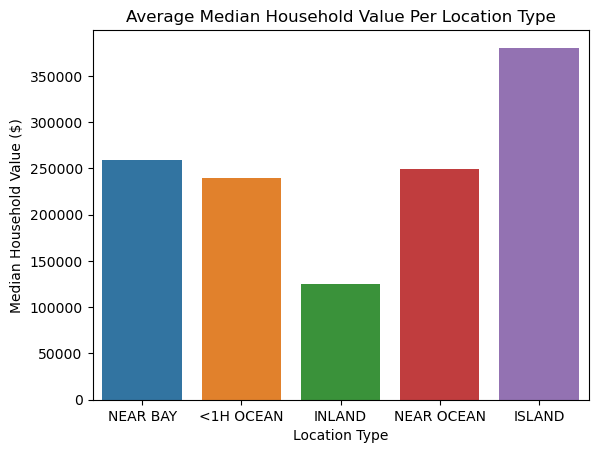

In [14]:
sns.barplot(x=list(y.keys()), y=list(y.values()))
plt.title('Average Median Household Value Per Location Type')
plt.xlabel('Location Type')
plt.ylabel('Median Household Value ($)')
plt.show()

### Median Value of Household Per Income Category

In [15]:
# Make median income into categorical bins
est = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
income_array = np.array(df['median_income']).reshape(-1,1)
est.fit(income_array)
income_cat = est.transform(income_array)

# Store in dataframe as seperate column
df['income_category'] = income_cat

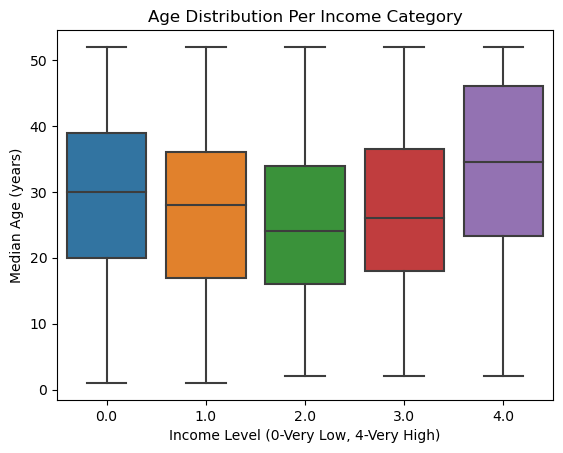

In [16]:
# Plot
sns.boxplot(data=df, y="housing_median_age", x='income_category')
plt.title('Age Distribution Per Income Category')
plt.xlabel('Income Level (0-Very Low, 4-Very High)')
plt.ylabel('Median Age (years)');
plt.show()

## Data Processing

In [17]:
# Drop columns that have NANs
df.dropna(axis=0, inplace=True)
df.shape

(20433, 11)

In [18]:
# Drop longitude and latitude (don't want to use that for predicting location) & income category
df = df.drop(['income_category', 'longitude', 'latitude'], axis = 1)

In [19]:
df.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [20]:
# Standard scale each column and store it in seperate df
scaler = StandardScaler()
df_scaled = copy(df)
for col in df.columns:
    if col != 'ocean_proximity':
        data = scaler.fit_transform(np.array(df[col]).reshape(-1,1))
        df_scaled[col] = data

In [22]:
# Drop longitude and latitude (don't want to use that for predicting location)
df_scaled.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0.982163,-0.803813,-0.970325,-0.973320,-0.976833,2.345163,2.128819,NEAR BAY
1,-0.606210,2.042130,1.348276,0.861339,1.670373,2.332632,1.313626,NEAR BAY
2,1.855769,-0.535189,-0.825561,-0.819769,-0.843427,1.782939,1.258183,NEAR BAY
3,1.855769,-0.623510,-0.718768,-0.765056,-0.733562,0.932970,1.164622,NEAR BAY
4,1.855769,-0.461970,-0.611974,-0.758879,-0.628930,-0.013143,1.172418,NEAR BAY


# Machine Learning Implementation

## KNN Model Creation & GridSearchCV

In [23]:
# Extract x and y values
x_feat_list = [col for col in df_scaled.columns if col != 'ocean_proximity']
y_feat = 'ocean_proximity'

x = df_scaled.loc[:, x_feat_list].values
y = df_scaled.loc[:, y_feat].values

In [24]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [25]:
# Set parameters for GridSearchCV on training data
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}

knn = KNeighborsClassifier()

In [26]:
grid_search = GridSearchCV(knn, param_grid, cv=5)

In [27]:
grid_search.fit(X_train, y_train)

/Users/srihariraman/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/Users/srihariraman/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/srihariraman/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically pr

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']})

In [28]:
itr_scores = grid_search.cv_results_
itr_scores

{'mean_fit_time': array([0.01997986, 0.01890149, 0.01929908, 0.01890874, 0.01899061,
        0.01890593]),
 'std_fit_time': array([1.48452385e-03, 2.48359736e-04, 2.94893131e-04, 4.60070025e-05,
        1.89670490e-04, 6.34715575e-05]),
 'mean_score_time': array([0.11208687, 0.04755039, 0.1234776 , 0.05542226, 0.12536173,
        0.06262994]),
 'std_score_time': array([0.00212811, 0.00120037, 0.00564657, 0.00145001, 0.00321803,
        0.00155065]),
 'param_n_neighbors': masked_array(data=[3, 3, 5, 5, 7, 7],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_weights': masked_array(data=['uniform', 'distance', 'uniform', 'distance',
                    'uniform', 'distance'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 3, 'weights': 'uniform'},
  {'n_neighbors': 3, 'weights': 'distance'},
  {'n_neighbors': 5, 'weights'

In [29]:
# Fetch best parameters
results = grid_search.best_params_
results

{'n_neighbors': 7, 'weights': 'uniform'}

## KNN Model Implementation

In [30]:
model = KNeighborsClassifier(n_neighbors=results['n_neighbors'], weights=results['weights'])

In [31]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [32]:
y_pred = model.predict(X_test)

/Users/srihariraman/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## Model Evaluation

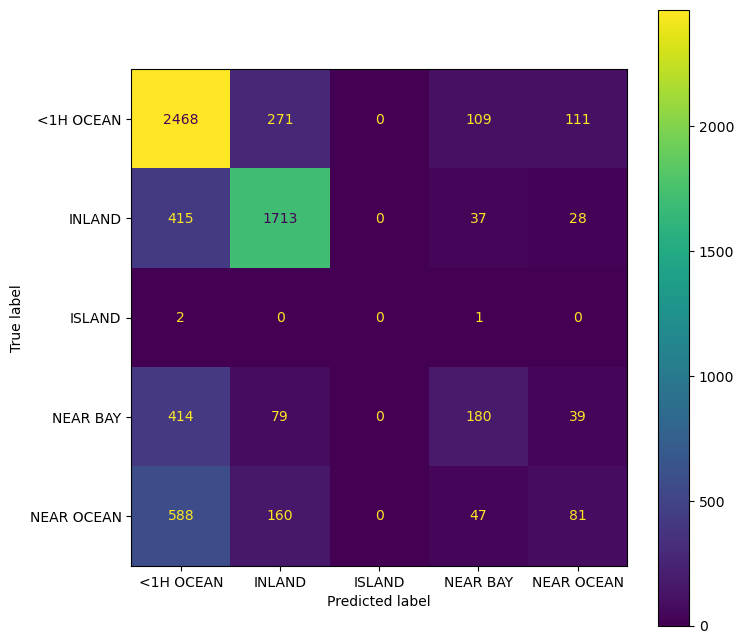

In [33]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)

# examine confusion matri
conf_mat

# Plot matrix
conf_mat_disp = ConfusionMatrixDisplay(conf_mat, display_labels=np.unique(y_test))
conf_mat_disp.plot()

plt.gcf().set_size_inches(8, 8)

# seaborn turns on grid by default ... looks best without it
plt.grid(False)

In [34]:
accuracy_score(y_true=y_test, y_pred=y_pred)

0.6587572297197093

In [35]:
precision_score(y_true=y_test, y_pred=y_pred, average='weighted')

/Users/srihariraman/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.6206875678861857

## Feature Selection

The goal is to select the top number features that are most prevalant in predicting the location of the house

In [36]:
# Set up SelectKBest algorithm for all potential number of features
scores = []
model = KNeighborsClassifier(n_neighbors=results['n_neighbors'], weights=results['weights'])
k_vals = [i for i in range(1,len(df_scaled.columns))]

for k_val in k_vals:
    # Use SelectKBest algorithm to select 5 most important features
    selector = SelectKBest(score_func=f_classif, k=k_val)
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)
    
    # Train KNN and evaluate
    model.fit(X_train_selected, y_train)
    
    # Append scores to list
    scores.append(model.score(X_test_selected, y_test))

/Users/srihariraman/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/srihariraman/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None wi

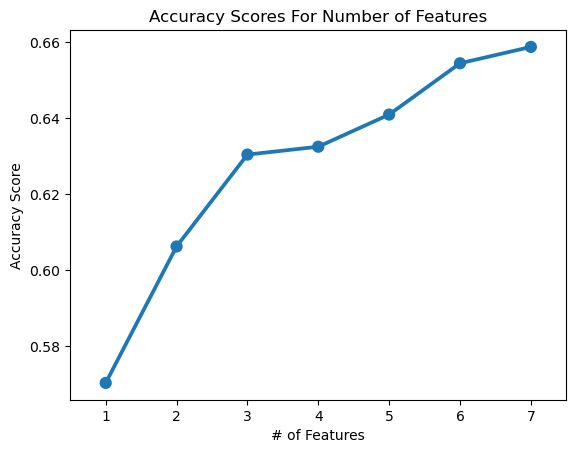

In [37]:
sns.pointplot(x=k_vals, y=scores)
plt.title('Accuracy Scores For Number of Features')
plt.xlabel('# of Features')
plt.ylabel('Accuracy Score');

In [38]:
# Get masks for each feature to pick which features to include in the model
selected_masks = selector.get_support()
selected_features = [feature for feature, selected in zip(x_feat_list, selected_masks) if selected]

In [39]:
# What are the selected features to include???
selected_features

['housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

<strong>Analysis:</strong> From the above feature selection algorithm and the supplemental graph, we can tell that the best model implements all features in the dataset to create the greatest accuracy in its predictions!

## Final Model Implementation + Evaluation

In [40]:
# Train final KNN model and evaluate
model = KNeighborsClassifier(n_neighbors=results['n_neighbors'], weights=results['weights'])
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [41]:
model.score(X_test, y_test)

/Users/srihariraman/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.6587572297197093

In [42]:
precision_score(y_true=y_test, y_pred=y_pred, average='weighted')

/Users/srihariraman/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.6206875678861857